# Binomial Distributions

A bank issues credit cards. 60% of customers pay their bill on time.

If a sample of 7 accounts is selected at random from current customers, construct the binomial probability distribution of accounts paying on time.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pyp

In [2]:
n=7 # 7 accounts selected

In [3]:
p=.6 # 60% probability of paying on time

In [4]:
k=np.arange(0,8)
k

array([0, 1, 2, 3, 4, 5, 6, 7])

In [5]:
binomial = stats.binom.pmf(k,n,p)
binomial

array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

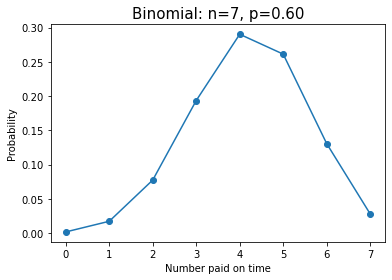

In [6]:
pyp.plot(k, binomial, 'o-')
pyp.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
pyp.xlabel('Number paid on time')
pyp.ylabel('Probability')
pyp.show()

# Normal Distribution

The mean weight of a cereal package is 0.295kg with a 0.025kg standard deviation. The actual weight of a package follows a normal distribution.

* What is the probability that the pack weighs **less than 0.280kg**?
* What is the probability that the pack weighs **more than 0.350kg**?
* What is the probability that the pack weighs **between 0.260kg and 0.340kg**?

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [9]:
# Calculate Z value for the first question - weight in question (.28kg) 
# minus mean weight divided by standard deviation
z = (.28-.295)/.025
z

-0.5999999999999983

In [10]:
# You can pass this z value in directly
stats.norm.cdf(z)

0.2742531177500741

In [11]:
# Or, you can pass the individual values in
stats.norm.cdf(.28, loc=.295, scale=.025)

0.2742531177500741

So the probability of a pack weighing less than .28kg is 27.43%

To calculate the area to the right instead of the left, subtract the value from 1:

In [12]:
b = stats.norm.cdf(.35, loc=.295, scale=.025)
b

0.9860965524865014

In [13]:
1-b

0.01390344751349859

So the probability of a pack weighing **more** than .35kg is 1.40%

And to find a range, subtract the result for the smaller value from the result for the larger value

In [16]:
lower = stats.norm.cdf(.26, loc=.295, scale=.025)
lower

0.08075665923377118

In [15]:
upper = stats.norm.cdf(.34, loc=.295, scale=.025)
upper

0.9640696808870743

In [17]:
upper - lower

0.8833130216533032

So the probability of a pack weighing between .26kg and .34kg is 88.33%

# Poisson Distribution

If a bank averages 6 people per minute, find:

* The probability distribution for up to 20 people per minute
* The probability of at least 4 people per minute

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [19]:
# Variables
rate = 6

In [20]:
# To calculate distributions for up to 20, create the range the
# same way we did before
n = np.arange(0,20)
poisson = stats.poisson.pmf(n, rate)
poisson

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

In [21]:
# To answer the second prompt, take the values of 0-3 people and
# subtract that sum from 1 to get the probability of 4+ people
1 - (poisson[0] + poisson[1] + poisson[2] + poisson[3])

0.8487961172233521

So the probability of 4 or more people is 84.88%

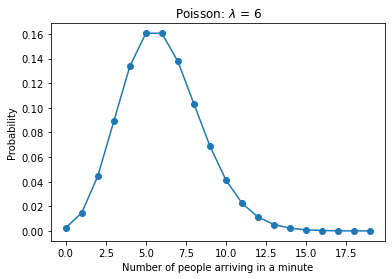

In [23]:
plt.plot(n, poisson, 'o-')
plt.title('Poisson: $\lambda$ = %i' % rate)
plt.xlabel('Number of people arriving in a minute')
plt.ylabel('Probability')
plt.show()

In [24]:
# As a sanity check, these values should add up to 1
sum(poisson)

0.9999948198310626